In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('VSRR_Provisional_Drug_Overdose_Death_Counts.csv')

In [12]:
data.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')

Inspect the data

In [13]:
print(data.head())
print(data.info())

  State  Year  Month           Period  \
0    AK  2020  April  12 month-ending   
1    AK  2020  April  12 month-ending   
2    AK  2020  April  12 month-ending   
3    AK  2020  April  12 month-ending   
4    AK  2020  April  12 month-ending   

                                           Indicator  Data Value  \
0                     Number of Drug Overdose Deaths       120.0   
1                        Opioids (T40.0-T40.4,T40.6)        74.0   
2         Synthetic opioids, excl. methadone (T40.4)        31.0   
3  Natural, semi-synthetic, & synthetic opioids, ...        57.0   
4           Natural & semi-synthetic opioids (T40.2)        30.0   

  Percent Complete  Percent Pending Investigation State Name  \
0              100                            0.0     Alaska   
1              100                            0.0     Alaska   
2              100                            0.0     Alaska   
3              100                            0.0     Alaska   
4              100      

Dropping un-need columns

In [14]:
columns_to_drop = ['Footnote', 'Footnote Symbol', 'Predicted Value']
data = data.drop(columns=columns_to_drop)

In [15]:
data.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name'],
      dtype='object')

Transforming data types

In [16]:
data['Data Value'] = pd.to_numeric(data['Data Value'], errors='coerce', downcast='float')

In [17]:
data.dtypes

State                             object
Year                               int64
Month                             object
Period                            object
Indicator                         object
Data Value                       float32
Percent Complete                  object
Percent Pending Investigation    float64
State Name                        object
dtype: object

In [18]:
data.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name'],
      dtype='object')

Removing rows with NULL or infinite values

In [19]:
data['Indicator'].replace('', float('nan'), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40689 entries, 0 to 40688
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          40689 non-null  object 
 1   Year                           40689 non-null  int64  
 2   Month                          40689 non-null  object 
 3   Period                         40689 non-null  object 
 4   Indicator                      40689 non-null  object 
 5   Data Value                     27749 non-null  float32
 6   Percent Complete               27729 non-null  object 
 7   Percent Pending Investigation  40689 non-null  float64
 8   State Name                     40689 non-null  object 
dtypes: float32(1), float64(1), int64(1), object(6)
memory usage: 2.6+ MB


Renaming columns

In [20]:
data = data.rename(columns={'State Name': 'State_Name'})

In [21]:
data.rename

<bound method DataFrame.rename of       State  Year  Month           Period  \
0        AK  2020  April  12 month-ending   
1        AK  2020  April  12 month-ending   
2        AK  2020  April  12 month-ending   
3        AK  2020  April  12 month-ending   
4        AK  2020  April  12 month-ending   
...     ...   ...    ...              ...   
40684    YC  2021  March  12 month-ending   
40685    YC  2021  March  12 month-ending   
40686    YC  2021  March  12 month-ending   
40687    YC  2021  March  12 month-ending   
40688    YC  2021  March  12 month-ending   

                                               Indicator   Data Value  \
0                         Number of Drug Overdose Deaths   120.000000   
1                            Opioids (T40.0-T40.4,T40.6)    74.000000   
2             Synthetic opioids, excl. methadone (T40.4)    31.000000   
3      Natural, semi-synthetic, & synthetic opioids, ...    57.000000   
4               Natural & semi-synthetic opioids (T40.2)    

Remove duplicate rows

In [22]:
data = data.drop_duplicates()

In [23]:
print("Number of rows after dropping duplicates:", len(data))

Number of rows after dropping duplicates: 40689


In [24]:
print(data.head())

  State  Year  Month           Period  \
0    AK  2020  April  12 month-ending   
1    AK  2020  April  12 month-ending   
2    AK  2020  April  12 month-ending   
3    AK  2020  April  12 month-ending   
4    AK  2020  April  12 month-ending   

                                           Indicator  Data Value  \
0                     Number of Drug Overdose Deaths       120.0   
1                        Opioids (T40.0-T40.4,T40.6)        74.0   
2         Synthetic opioids, excl. methadone (T40.4)        31.0   
3  Natural, semi-synthetic, & synthetic opioids, ...        57.0   
4           Natural & semi-synthetic opioids (T40.2)        30.0   

  Percent Complete  Percent Pending Investigation State_Name  
0              100                            0.0     Alaska  
1              100                            0.0     Alaska  
2              100                            0.0     Alaska  
3              100                            0.0     Alaska  
4              100           

Dealing with Outliers(using the IQR method)

In [25]:
Q1 = data['Data Value'].quantile(0.25)
Q3 = data['Data Value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Data Value'] = data['Data Value'].clip(lower=lower_bound, upper=upper_bound)

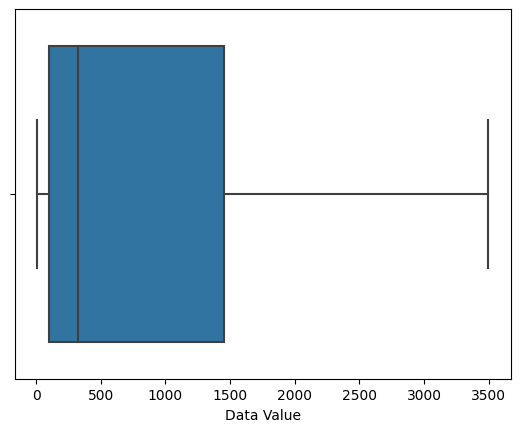

In [26]:
sns.boxplot(data=data, x='Data Value')
plt.show()

In [27]:
data.describe()

,Year,Data Value,Percent Pending Investigation
count,40689.000000,27749.000000,40689.000000
mean,2017.651183,1010.485827,0.119705
std,1.811712,1289.283341,0.165763
min,2015.000000,10.000000,0.000000
25%,2016.000000,96.669998,0.018131
50%,2018.000000,327.000000,0.054264
75%,2019.000000,1457.000000,0.154477
max,2021.000000,3497.494934,1.411568


Calculated Field

In [28]:
data['Percent Complete'] = pd.to_numeric(data['Percent Complete'], errors='coerce')
data['Percent Pending Investigation'] = pd.to_numeric(data['Percent Pending Investigation'], errors='coerce')
data['Total Percent'] = data['Percent Complete'] + data['Percent Pending Investigation']
data

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State_Name,Total Percent
0,AK,2020,April,12 month-ending,Number of Drug Overdose Deaths,120.000000,100.0,0.000000,Alaska,100.000000
1,AK,2020,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",74.000000,100.0,0.000000,Alaska,100.000000
2,AK,2020,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",31.000000,100.0,0.000000,Alaska,100.000000
3,AK,2020,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",57.000000,100.0,0.000000,Alaska,100.000000
4,AK,2020,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),30.000000,100.0,0.000000,Alaska,100.000000
...,...,...,...,...,...,...,...,...,...,...
40684,YC,2021,March,12 month-ending,Cocaine (T40.5),908.000000,100.0,0.258858,New York City,100.258858
40685,YC,2021,March,12 month-ending,Percent with drugs specified,99.059998,100.0,0.258858,New York City,100.258858
40686,YC,2021,March,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",1853.000000,100.0,0.258858,New York City,100.258858
40687,YC,2021,March,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",672.000000,100.0,0.258858,New York City,100.258858


Creating a categorical column based on a condition

In [29]:
data['HighValue'] = data['Data Value'].apply(lambda x: 'High' if x > 50 else 'Low')
data

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State_Name,Total Percent,HighValue
0,AK,2020,April,12 month-ending,Number of Drug Overdose Deaths,120.000000,100.0,0.000000,Alaska,100.000000,High
1,AK,2020,April,12 month-ending,"Opioids (T40.0-T40.4,T40.6)",74.000000,100.0,0.000000,Alaska,100.000000,High
2,AK,2020,April,12 month-ending,"Synthetic opioids, excl. methadone (T40.4)",31.000000,100.0,0.000000,Alaska,100.000000,Low
3,AK,2020,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",57.000000,100.0,0.000000,Alaska,100.000000,High
4,AK,2020,April,12 month-ending,Natural & semi-synthetic opioids (T40.2),30.000000,100.0,0.000000,Alaska,100.000000,Low
...,...,...,...,...,...,...,...,...,...,...,...
40684,YC,2021,March,12 month-ending,Cocaine (T40.5),908.000000,100.0,0.258858,New York City,100.258858,High
40685,YC,2021,March,12 month-ending,Percent with drugs specified,99.059998,100.0,0.258858,New York City,100.258858,High
40686,YC,2021,March,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",1853.000000,100.0,0.258858,New York City,100.258858,High
40687,YC,2021,March,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",672.000000,100.0,0.258858,New York City,100.258858,High


In [30]:
data.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State_Name',
       'Total Percent', 'HighValue'],
      dtype='object')

Saving to a CSV new file

In [31]:
data.to_csv("cleanData.csv", index=False)
print(data.head())

  State  Year  Month           Period  \
0    AK  2020  April  12 month-ending   
1    AK  2020  April  12 month-ending   
2    AK  2020  April  12 month-ending   
3    AK  2020  April  12 month-ending   
4    AK  2020  April  12 month-ending   

                                           Indicator  Data Value  \
0                     Number of Drug Overdose Deaths       120.0   
1                        Opioids (T40.0-T40.4,T40.6)        74.0   
2         Synthetic opioids, excl. methadone (T40.4)        31.0   
3  Natural, semi-synthetic, & synthetic opioids, ...        57.0   
4           Natural & semi-synthetic opioids (T40.2)        30.0   

   Percent Complete  Percent Pending Investigation State_Name  Total Percent  \
0             100.0                            0.0     Alaska          100.0   
1             100.0                            0.0     Alaska          100.0   
2             100.0                            0.0     Alaska          100.0   
3             100.0     